<a href="https://colab.research.google.com/github/Emdejeee/pengolahancitra_JB4/blob/main/Jobsheet_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Praktikum 1. Transormasi Kurva (Citra Negatif)

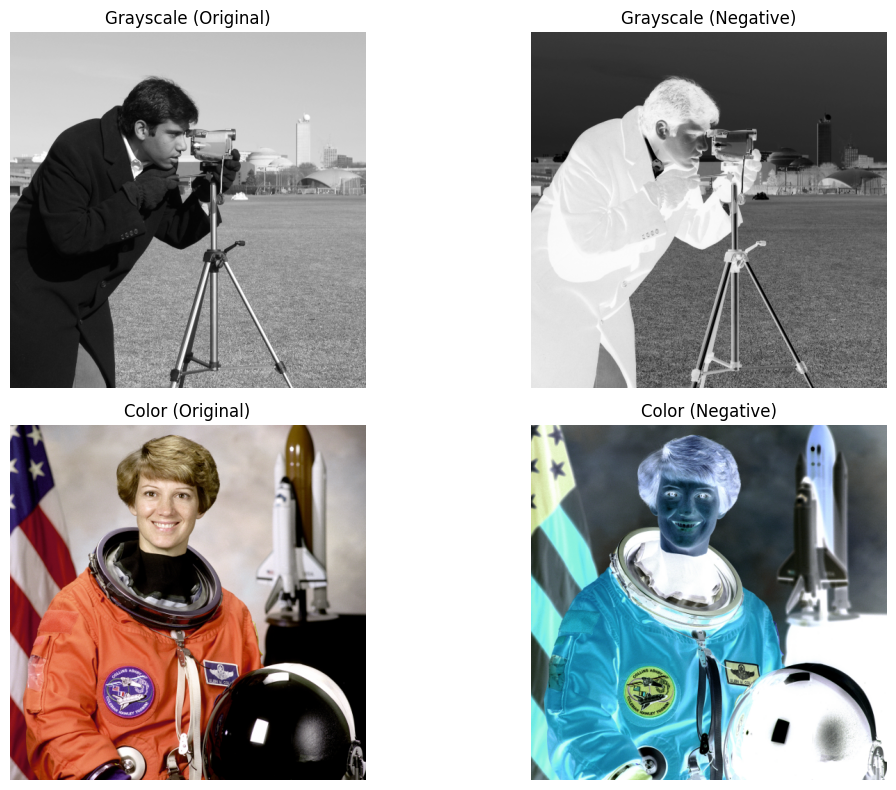

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float

# ===================
# 1. TRANSFORMASI NEGATIF CITRA GRAYSCALE
# ===================
image_gray_uint8 = data.camera() # Citra grayscale (512x512, 0..255)
image_gray_float = img_as_float(image_gray_uint8) # Konversi ke float[0..1]

negative_gray = 1.0 - image_gray_float # Inversi intensitas: output =1 - input

# ===================
# 2. TRANSFORMASI NEGATIF CITRA BERWARNA
# ===================
image_color_uint8 = data.astronaut() # Citra berwarna (512x512x3,0..255)
image_color_float = img_as_float(image_color_uint8) # Konversi ke float[0..1]
negative_color = 1.0 - image_color_float # Inversi intensitas tiap kanal RGB

# ===================
# 3. PLOTTING HASIL
# ===================
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Baris 1: Grayscale (original, negative)
axes[0, 0].imshow(image_gray_float, cmap='gray')
axes[0, 0].set_title("Grayscale (Original)")
axes[0, 0].axis('off')

axes[0, 1].imshow(negative_gray, cmap='gray')
axes[0, 1].set_title("Grayscale (Negative)")
axes[0, 1].axis('off')

# Baris 2: RGB (original, negative)
axes[1, 0].imshow(image_color_float)
axes[1, 0].set_title("Color (Original)")
axes[1, 0].axis('off')

axes[1, 1].imshow(negative_color)
axes[1, 1].set_title("Color (Negative)")
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

## Praktikum 2. Histogram dan Ekualisasi Histogram

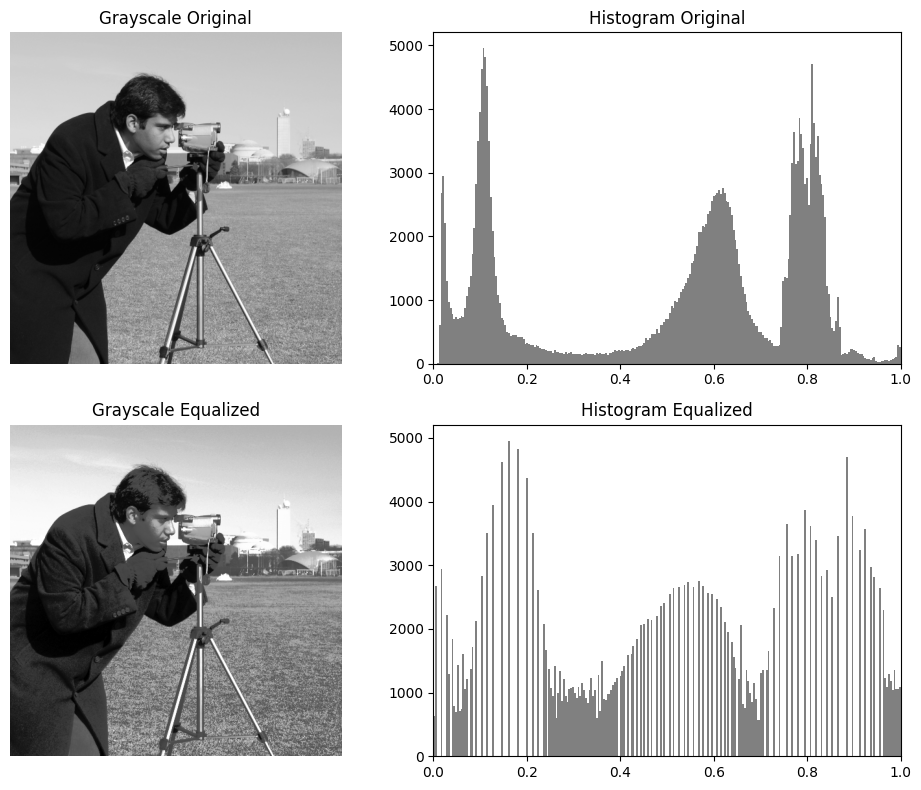

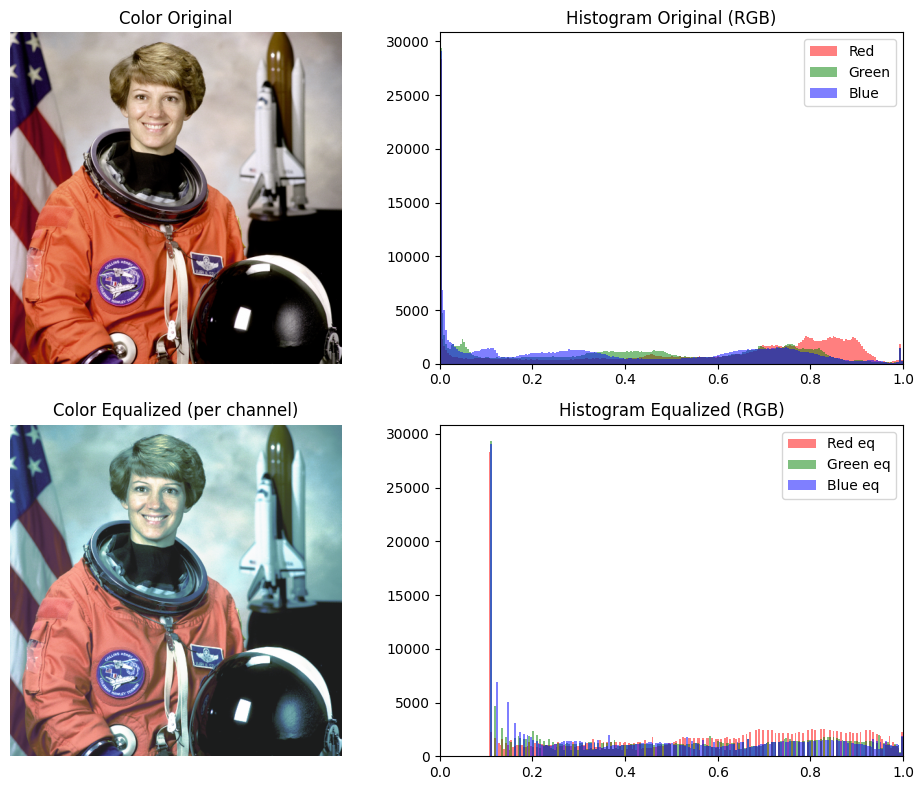

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, exposure, img_as_float

# -----------------------------------------------------
# BAGIAN 1: HISTOGRAM & EKUALISASI HISTOGRAM (GRAYSCALE)
# -----------------------------------------------------

# 1. Memuat citra grayscale
image_gray_uint8 = data.camera() # sudah grayscale (uint8, 0..255)
image_gray = img_as_float(image_gray_uint8) # konversi ke float [0..1]

# 2. Menghitung histogram citra asli (dengan numpy.histogram)
# Kita perbesar bins=256 untuk melihat distribusi piksel
hist_gray, bins_gray = np.histogram(image_gray.ravel(), bins=256, range=(0,1))

# 3. Ekualisasi histogram
# Dengan skimage.exposure.equalize_hist, hasil di rentang [0..1]
image_gray_eq = exposure.equalize_hist(image_gray)
hist_gray_eq, bins_gray_eq = np.histogram(image_gray_eq.ravel(), bins=256, range=(0,1))

# 4. Plot grayscale: citra asli & histogram, citra ekualisasi & histogram
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# (a) Citra Asli Grayscale
axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title("Grayscale Original")
axes[0, 0].axis('off')

# (b) Histogram Citra Asli
axes[0, 1].hist(image_gray.ravel(), bins=256, range=(0,1), color='gray')
axes[0, 1].set_title("Histogram Original")
axes[0, 1].set_xlim(0,1)

# (c) Citra Hasil Ekualisasi
axes[1, 0].imshow(image_gray_eq, cmap='gray')
axes[1, 0].set_title("Grayscale Equalized")
axes[1, 0].axis('off')

# (d) Histogram Citra Hasil Ekualisasi
axes[1, 1].hist(image_gray_eq.ravel(), bins=256, range=(0,1), color='gray')
axes[1, 1].set_title("Histogram Equalized")
axes[1, 1].set_xlim(0,1)

plt.tight_layout()
plt.show()

# -------------------------------------------------------
# BAGIAN 2: HISTOGRAM & EKUALISASI HISTOGRAM (CITRA WARNA)
# -------------------------------------------------------

# 1. Memuat citra berwarna
image_color_uint8 = data.astronaut() # citra berwarna RGB (uint8)
image_color = img_as_float(image_color_uint8) # konversi ke float [0..1]

# 2. Kita dapat menghitung histogram gabungan (semua kanal) atau perkanal
# Di sini kita tampilkan histogram gabungan R, G, B untuk citra asli.
r_channel = image_color[:,:,0]
g_channel = image_color[:,:,1]
b_channel = image_color[:,:,2]

# Hitung histogram untuk tiap kanal, 256 bins
hist_r, bins_r = np.histogram(r_channel.ravel(), bins=256, range=(0,1))
hist_g, bins_g = np.histogram(g_channel.ravel(), bins=256, range=(0,1))
hist_b, bins_b = np.histogram(b_channel.ravel(), bins=256, range=(0,1))

# 3. Ekualisasi histogram tiap kanal secara independen
# (Catatan: cara ini bisa mengubah keseimbangan warna.
# Terkadang lebih baik melakukan ekualisasi hanya pada kanal luminance (Y)
# atau Value (HSV). Tapi di sini kita tunjukkan contoh per kanal.)
r_eq = exposure.equalize_hist(r_channel)
g_eq = exposure.equalize_hist(g_channel)
b_eq = exposure.equalize_hist(b_channel)

# Gabungkan kembali menjadi citra RGB yang sudah di-ekualisasi
image_color_eq = np.dstack((r_eq, g_eq, b_eq))

# Hitung histogram citra berwarna ekualisasi (tiap kanal)
hist_r_eq, bins_r_eq = np.histogram(r_eq.ravel(), bins=256, range=(0,1))
hist_g_eq, bins_g_eq = np.histogram(g_eq.ravel(), bins=256, range=(0,1))
hist_b_eq, bins_b_eq = np.histogram(b_eq.ravel(), bins=256, range=(0,1))

# 4. Plot citra berwarna & histogram
fig2, axes2 = plt.subplots(2, 2, figsize=(10, 8))

# (a) Citra Asli (Color)
axes2[0, 0].imshow(image_color)
axes2[0, 0].set_title("Color Original")
axes2[0, 0].axis('off')

# (b) Histogram Asli (tumpuk R, G, B)
axes2[0, 1].hist(r_channel.ravel(), bins=256, range=(0,1), color='red', alpha=0.5, label='Red')
axes2[0, 1].hist(g_channel.ravel(), bins=256, range=(0,1), color='green', alpha=0.5, label='Green')
axes2[0, 1].hist(b_channel.ravel(), bins=256, range=(0,1), color='blue', alpha=0.5, label='Blue')
axes2[0, 1].set_title("Histogram Original (RGB)")
axes2[0, 1].set_xlim(0,1)
axes2[0, 1].legend(loc='upper right')

# (c) Citra Hasil Ekualisasi (RGB)
axes2[1, 0].imshow(image_color_eq)
axes2[1, 0].set_title("Color Equalized (per channel)")
axes2[1, 0].axis('off')

# (d) Histogram Ekualisasi (tumpuk R, G, B)
axes2[1, 1].hist(r_eq.ravel(), bins=256, range=(0,1), color='red', alpha=0.5, label='Red eq')
axes2[1, 1].hist(g_eq.ravel(), bins=256, range=(0,1), color='green', alpha=0.5, label='Green eq')
axes2[1, 1].hist(b_eq.ravel(), bins=256, range=(0,1), color='blue', alpha=0.5, label='Blue eq')
axes2[1, 1].set_title("Histogram Equalized (RGB)")
axes2[1, 1].set_xlim(0,1)
axes2[1, 1].legend(loc='upper right')

plt.tight_layout()
plt.show()

## Praktikum 3. Konvolusi (Filter Rata-rata)

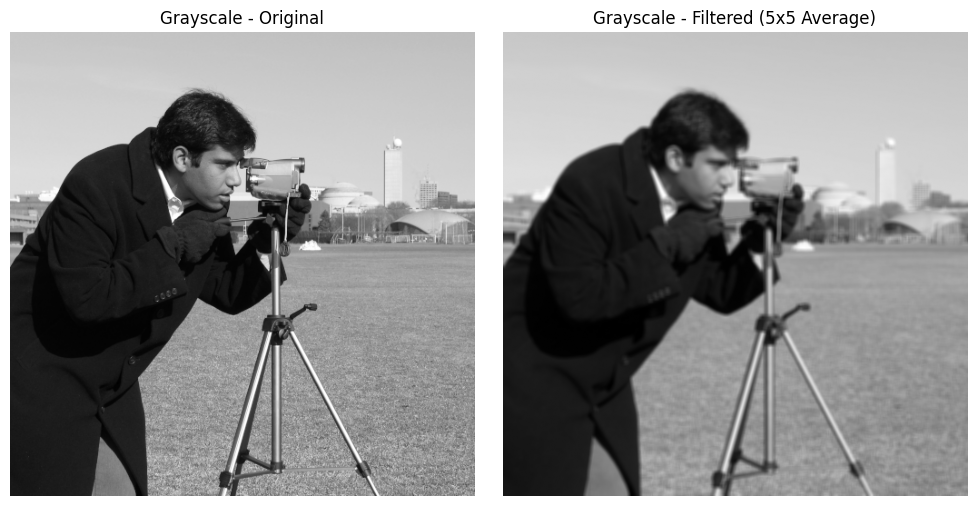

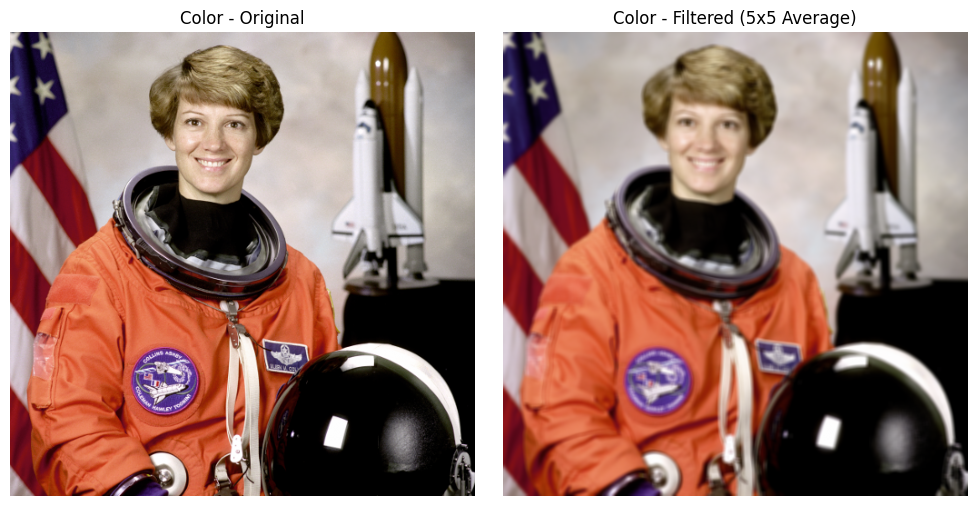

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from scipy import ndimage as ndi

# --------------------------------------------------
# 1) FILTER RATA-RATA PADA CITRA GRAYSCALE
# --------------------------------------------------

# A. Memuat citra grayscale (camera)
gray_uint8 = data.camera() # range 0..255
gray_img = img_as_float(gray_uint8) # konversi menjadi float [0..1] untuk kemudahan

# B. Definisikan kernel filter rata-rata (contoh: 5x5)
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), dtype=float) / (kernel_size * kernel_size)

# C. Lakukan konvolusi pada citra grayscale
gray_filtered = ndi.convolve(gray_img, kernel, mode='reflect')

# D. Tampilkan hasil
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(gray_img, cmap='gray')
axes[0].set_title("Grayscale - Original")
axes[0].axis('off')

axes[1].imshow(gray_filtered, cmap='gray')
axes[1].set_title(f"Grayscale - Filtered ({kernel_size}x{kernel_size} Average)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# --------------------------------------------------
# 2) FILTER RATA-RATA PADA CITRA BERWARNA
# --------------------------------------------------

# A. Memuat citra berwarna (astronaut)
color_uint8 = data.astronaut() # citra RGB (uint8, 0..255)
color_img = img_as_float(color_uint8) # konversi float [0..1]

# B. Kita akan terapkan filter rata-rata pada tiap kanal R, G, B
# secara terpisah, lalu gabungkan.
color_filtered = np.zeros_like(color_img)

for c in range(3): # c = 0 (Red), 1 (Green), 2 (Blue)
  channel_original = color_img[:, :, c]
  channel_filtered = ndi.convolve(channel_original, kernel, mode='reflect')
  color_filtered[:, :, c] = channel_filtered

# C. Tampilkan hasil
fig2, axes2 = plt.subplots(1, 2, figsize=(10, 5))
axes2[0].imshow(color_img)
axes2[0].set_title("Color - Original")
axes2[0].axis('off')

axes2[1].imshow(color_filtered)
axes2[1].set_title(f"Color - Filtered ({kernel_size}x{kernel_size} Average)")
axes2[1].axis('off')

plt.tight_layout()
plt.show()

## Praktikum 4. Filter Median (penghilangan noise/derau)

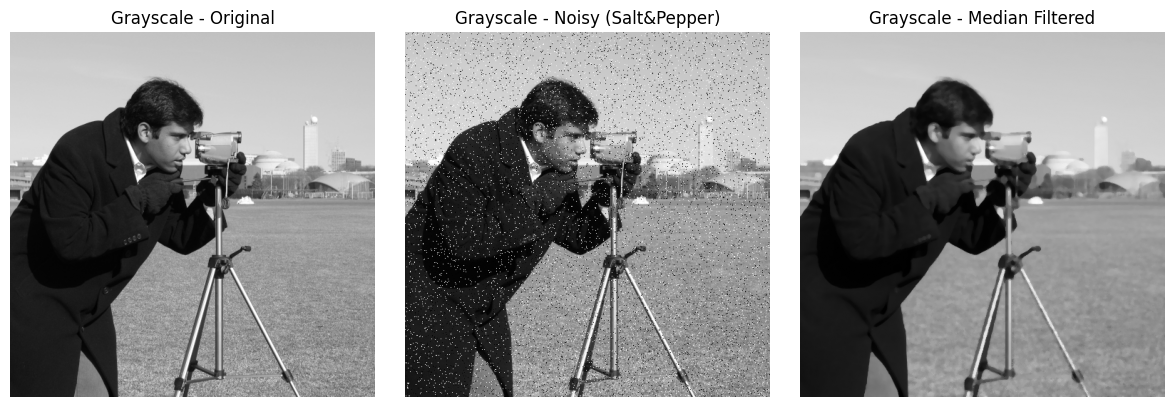

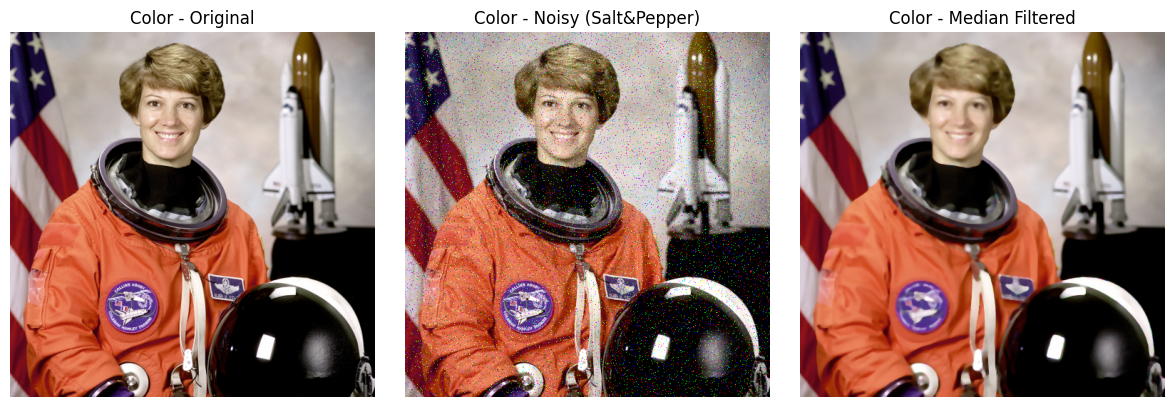

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, util, filters, morphology, img_as_float

# -----------------------------------------
# 1) FILTER MEDIAN PADA CITRA GRAYSCALE
# -----------------------------------------

# A. Memuat citra grayscale (contoh: 'camera')
gray_uint8 = data.camera() # grayscale, uint8
gray_float = img_as_float(gray_uint8) # konversi float [0..1]

# B. Menambahkan noise jenis salt-and-pepper
gray_noisy = util.random_noise(gray_float, mode='s&p', amount=0.05)
# amount=0.05 berarti 5% piksel terpengaruh noise

# C. Menerapkan filter median
# Kita gunakan structuring element berbentuk disk radius 3
disk3 = morphology.disk(3)
gray_denoised = filters.median(gray_noisy, disk3)

# D. Plot hasil
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(gray_float, cmap='gray')
axes[0].set_title("Grayscale - Original")
axes[0].axis('off')

axes[1].imshow(gray_noisy, cmap='gray')
axes[1].set_title("Grayscale - Noisy (Salt&Pepper)")
axes[1].axis('off')

axes[2].imshow(gray_denoised, cmap='gray')
axes[2].set_title("Grayscale - Median Filtered")
axes[2].axis('off')

plt.tight_layout()
plt.show()

# -----------------------------------------
# 2) FILTER MEDIAN PADA CITRA BERWARNA
# -----------------------------------------

# A. Memuat citra berwarna (contoh: 'astronaut')
color_uint8 = data.astronaut() # RGB, uint8
color_float = img_as_float(color_uint8) # rentang [0..1]

# B. Menambahkan noise salt-and-pepper
color_noisy = util.random_noise(color_float, mode='s&p', amount=0.05)

# C. Menerapkan filter median
# Pada scikit-image 0.19+, median() mampu menangani array 3D (RGB),
# atau kita bisa memanggil per kanal. Di sini langsung:
color_denoised = np.zeros_like(color_noisy)
for c in range(color_noisy.shape[2]):
  color_denoised[:, :, c] = filters.median(color_noisy[:, :, c], morphology.disk(3))

# D. Plot hasil
fig2, axes2 = plt.subplots(1, 3, figsize=(12, 4))
axes2[0].imshow(color_float)
axes2[0].set_title("Color - Original")
axes2[0].axis('off')

axes2[1].imshow(color_noisy)
axes2[1].set_title("Color - Noisy (Salt&Pepper)")
axes2[1].axis('off')

axes2[2].imshow(color_denoised)
axes2[2].set_title("Color - Median Filtered")
axes2[2].axis('off')

plt.tight_layout()
plt.show()

## Eksperimen Transformasi Intensitas Lain

In [4]:
# Upload gambar dari komputer
from google.colab import files
uploaded = files.upload()


Saving foto2.jpg to foto2.jpg


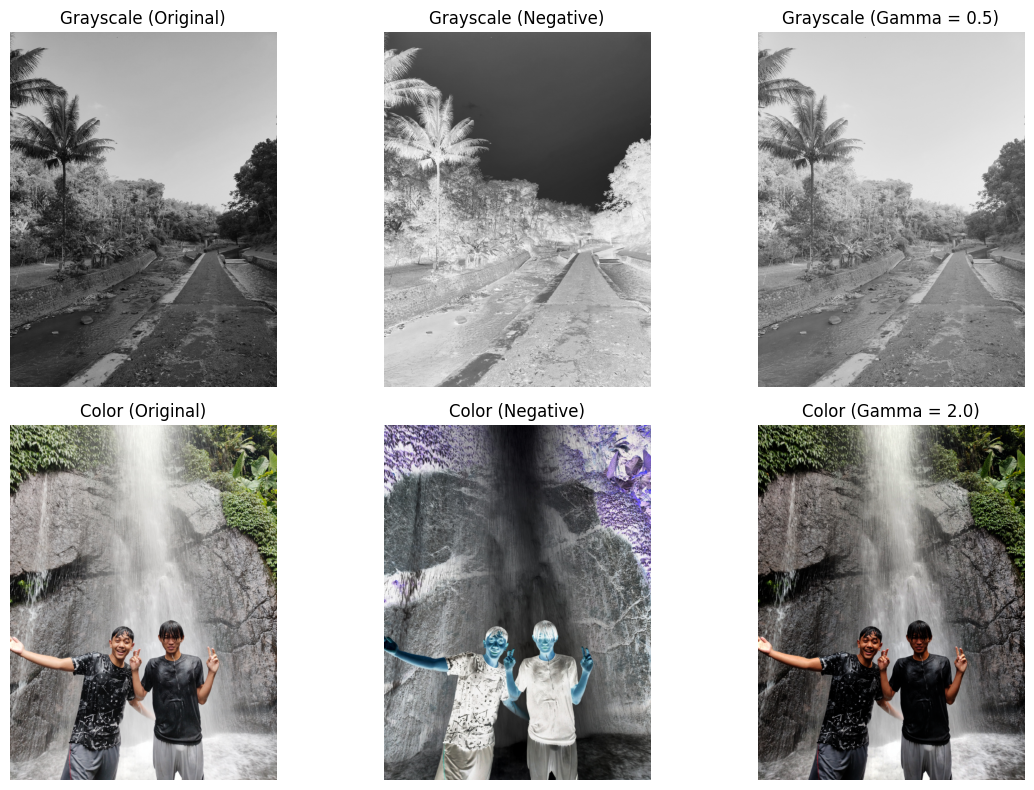

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float, color
from skimage.exposure import adjust_gamma

# ===================
# 1. TRANSFORMASI NEGATIF CITRA GRAYSCALE (foto1.jpg)
# ===================
image_gray_rgb = io.imread('foto1.jpg')  # Membaca gambar RGB
image_gray = color.rgb2gray(image_gray_rgb)  # Konversi ke grayscale
image_gray_float = img_as_float(image_gray)  # Konversi ke float [0..1]

negative_gray = 1.0 - image_gray_float  # Inversi intensitas
gamma_gray = adjust_gamma(image_gray_float, gamma=0.5)  # Gamma correction

# ===================
# 2. TRANSFORMASI NEGATIF CITRA BERWARNA (foto2.jpg)
# ===================
image_color = io.imread('foto2.jpg')  # Membaca gambar berwarna
image_color_float = img_as_float(image_color)  # Konversi ke float [0..1]

negative_color = 1.0 - image_color_float  # Inversi RGB
gamma_color = adjust_gamma(image_color_float, gamma=2.0)  # Gamma correction

# ===================
# 3. TAMPILKAN HASIL
# ===================
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Baris 1: Grayscale
axes[0, 0].imshow(image_gray_float, cmap='gray')
axes[0, 0].set_title("Grayscale (Original)")
axes[0, 0].axis('off')

axes[0, 1].imshow(negative_gray, cmap='gray')
axes[0, 1].set_title("Grayscale (Negative)")
axes[0, 1].axis('off')

axes[0, 2].imshow(gamma_gray, cmap='gray')
axes[0, 2].set_title("Grayscale (Gamma = 0.5)")
axes[0, 2].axis('off')

# Baris 2: Color
axes[1, 0].imshow(image_color_float)
axes[1, 0].set_title("Color (Original)")
axes[1, 0].axis('off')

axes[1, 1].imshow(negative_color)
axes[1, 1].set_title("Color (Negative)")
axes[1, 1].axis('off')

axes[1, 2].imshow(gamma_color)
axes[1, 2].set_title("Color (Gamma = 2.0)")
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


## Perbandingan Metode Peningkatan Kontras

In [6]:
# Jalankan ini dulu
from google.colab import files
uploaded = files.upload()  # Upload foto1.jpg (grayscale) dan foto2.jpg (warna)


Saving foto1.jpg to foto1 (1).jpg


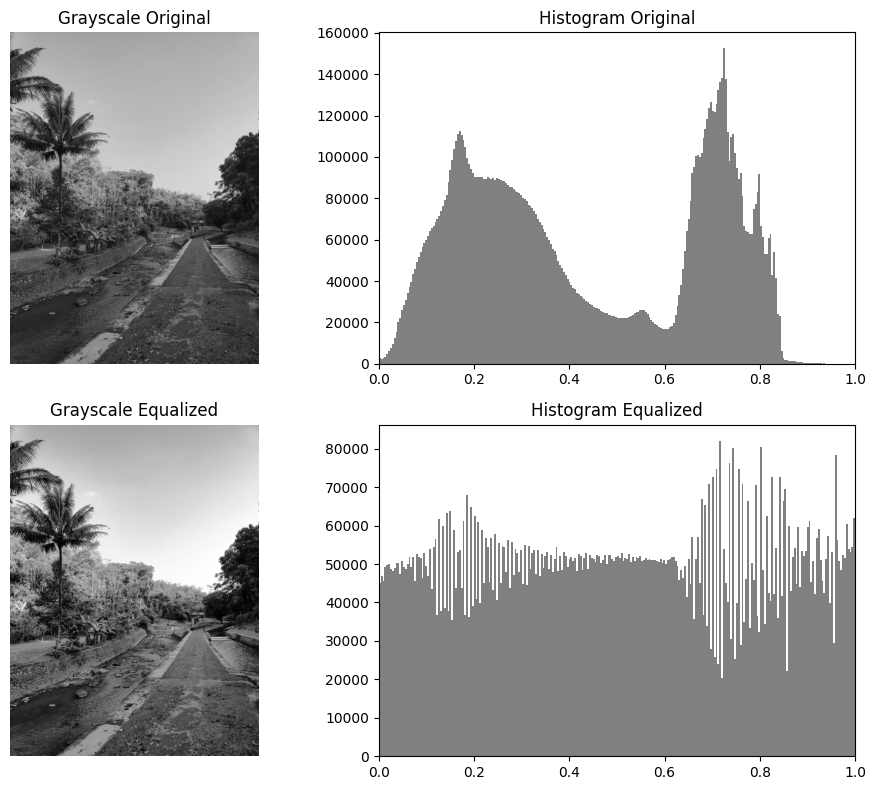

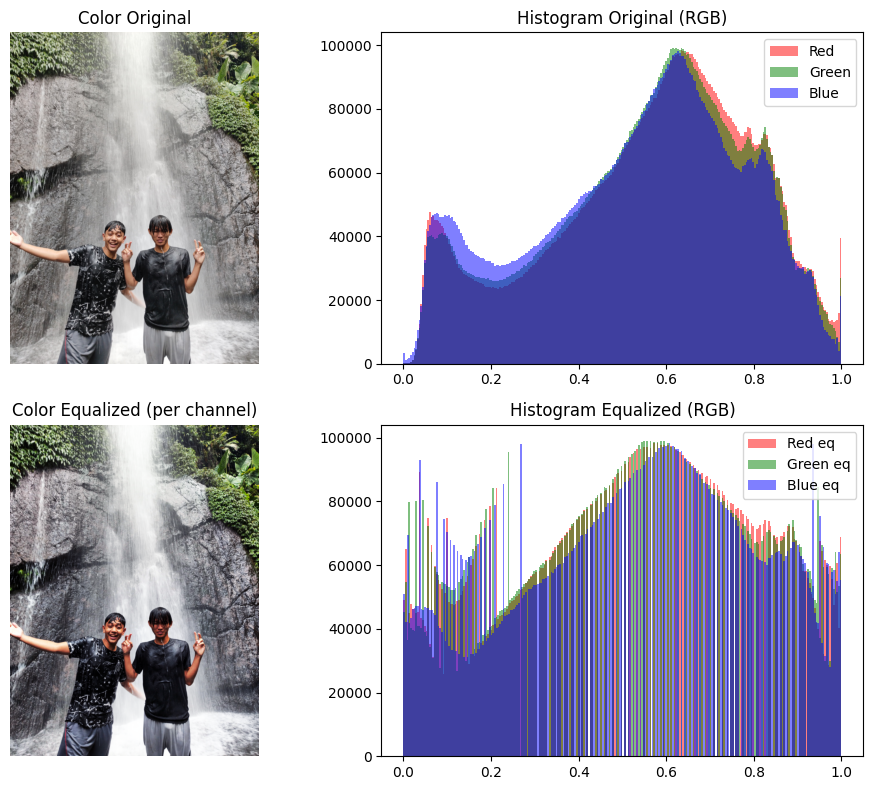

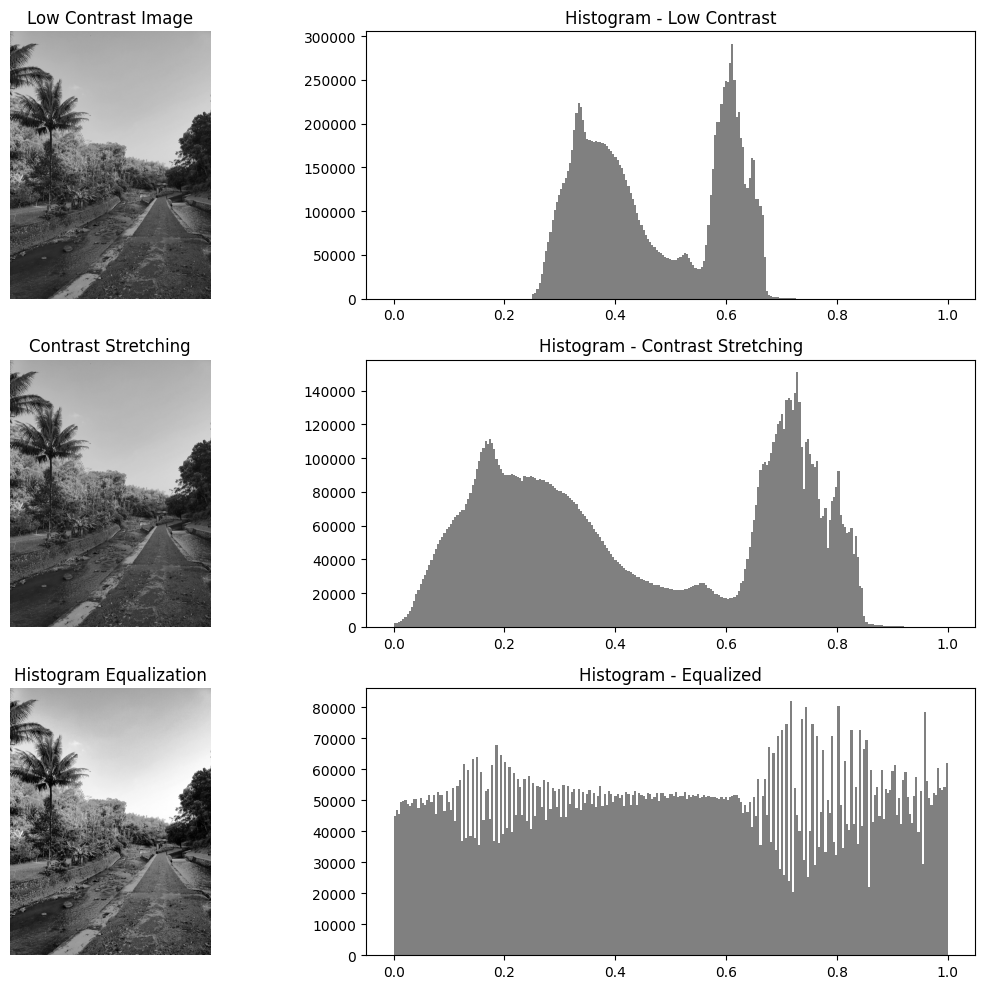

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure, img_as_float
from skimage.exposure import rescale_intensity

# ========================================================
# BAGIAN 1: HISTOGRAM & EKUALISASI HISTOGRAM (GRAYSCALE)
# ========================================================
# 1. Baca dan konversi citra grayscale
image_gray_rgb = io.imread('foto1.jpg')  # asumsikan ini RGB
image_gray = color.rgb2gray(image_gray_rgb)  # konversi ke grayscale
image_gray = img_as_float(image_gray)

# 2. Histogram original
hist_gray, bins_gray = np.histogram(image_gray.ravel(), bins=256, range=(0,1))

# 3. Ekualisasi histogram
image_gray_eq = exposure.equalize_hist(image_gray)
hist_gray_eq, bins_gray_eq = np.histogram(image_gray_eq.ravel(), bins=256, range=(0,1))

# 4. Tampilkan hasil grayscale
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title("Grayscale Original")
axes[0, 0].axis('off')

axes[0, 1].hist(image_gray.ravel(), bins=256, range=(0,1), color='gray')
axes[0, 1].set_title("Histogram Original")
axes[0, 1].set_xlim(0,1)

axes[1, 0].imshow(image_gray_eq, cmap='gray')
axes[1, 0].set_title("Grayscale Equalized")
axes[1, 0].axis('off')

axes[1, 1].hist(image_gray_eq.ravel(), bins=256, range=(0,1), color='gray')
axes[1, 1].set_title("Histogram Equalized")
axes[1, 1].set_xlim(0,1)

plt.tight_layout()
plt.show()

# ========================================================
# BAGIAN 2: HISTOGRAM & EKUALISASI HISTOGRAM (CITRA WARNA)
# ========================================================
# 1. Baca dan konversi ke float
image_color = img_as_float(io.imread('foto2.jpg'))

r = image_color[:,:,0]
g = image_color[:,:,1]
b = image_color[:,:,2]

# 2. Histogram asli
hist_r, _ = np.histogram(r.ravel(), bins=256, range=(0,1))
hist_g, _ = np.histogram(g.ravel(), bins=256, range=(0,1))
hist_b, _ = np.histogram(b.ravel(), bins=256, range=(0,1))

# 3. Ekualisasi per channel
r_eq = exposure.equalize_hist(r)
g_eq = exposure.equalize_hist(g)
b_eq = exposure.equalize_hist(b)

image_color_eq = np.dstack((r_eq, g_eq, b_eq))

# 4. Tampilkan hasil warna
fig2, axes2 = plt.subplots(2, 2, figsize=(10, 8))

axes2[0, 0].imshow(image_color)
axes2[0, 0].set_title("Color Original")
axes2[0, 0].axis('off')

axes2[0, 1].hist(r.ravel(), bins=256, color='red', alpha=0.5, label='Red')
axes2[0, 1].hist(g.ravel(), bins=256, color='green', alpha=0.5, label='Green')
axes2[0, 1].hist(b.ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
axes2[0, 1].set_title("Histogram Original (RGB)")
axes2[0, 1].legend()

axes2[1, 0].imshow(image_color_eq)
axes2[1, 0].set_title("Color Equalized (per channel)")
axes2[1, 0].axis('off')

axes2[1, 1].hist(r_eq.ravel(), bins=256, color='red', alpha=0.5, label='Red eq')
axes2[1, 1].hist(g_eq.ravel(), bins=256, color='green', alpha=0.5, label='Green eq')
axes2[1, 1].hist(b_eq.ravel(), bins=256, color='blue', alpha=0.5, label='Blue eq')
axes2[1, 1].set_title("Histogram Equalized (RGB)")
axes2[1, 1].legend()

plt.tight_layout()
plt.show()

# ========================================================
# BAGIAN 3: PERBANDINGAN CONTRAST STRETCHING VS HIST EQ
# ========================================================
# 1. Buat versi low contrast dari grayscale
image_low_contrast = np.clip(image_gray * 0.5 + 0.25, 0, 1)

# 2. Stretching & Equalization
image_stretched = rescale_intensity(image_low_contrast, in_range='image', out_range=(0,1))
image_eq = exposure.equalize_hist(image_low_contrast)

# 3. Tampilkan hasil perbandingan
fig3, axes3 = plt.subplots(3, 2, figsize=(12, 10))

axes3[0, 0].imshow(image_low_contrast, cmap='gray')
axes3[0, 0].set_title("Low Contrast Image")
axes3[0, 0].axis('off')

axes3[0, 1].hist(image_low_contrast.ravel(), bins=256, range=(0,1), color='gray')
axes3[0, 1].set_title("Histogram - Low Contrast")

axes3[1, 0].imshow(image_stretched, cmap='gray')
axes3[1, 0].set_title("Contrast Stretching")
axes3[1, 0].axis('off')

axes3[1, 1].hist(image_stretched.ravel(), bins=256, range=(0,1), color='gray')
axes3[1, 1].set_title("Histogram - Contrast Stretching")

axes3[2, 0].imshow(image_eq, cmap='gray')
axes3[2, 0].set_title("Histogram Equalization")
axes3[2, 0].axis('off')

axes3[2, 1].hist(image_eq.ravel(), bins=256, range=(0,1), color='gray')
axes3[2, 1].set_title("Histogram - Equalized")

plt.tight_layout()
plt.show()


## Filter Median vs Filter Rata-rata

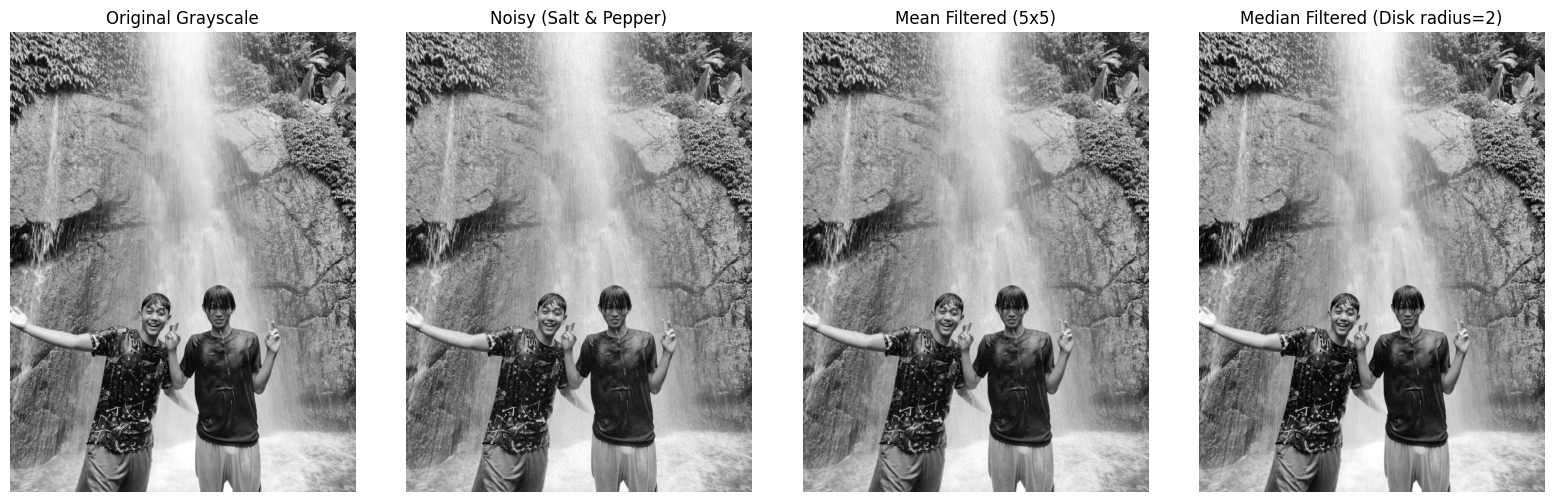

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float, util, filters, morphology
from scipy.ndimage import convolve

# 1. Memuat citra dari file upload dan ubah ke grayscale
image_rgb = io.imread('foto2.jpg')
gray_orig = color.rgb2gray(image_rgb)
gray_orig = img_as_float(gray_orig)

# Tambahkan noise salt & pepper
gray_noisy = util.random_noise(gray_orig, mode='s&p', amount=0.05)

# 2. Filter Rata-rata (Mean Filter)
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
gray_mean_filtered = convolve(gray_noisy, kernel, mode='reflect')

# 3. Filter Median
disk3 = morphology.disk(2)
gray_median_filtered = filters.median(gray_noisy, disk3)

# 4. Visualisasi
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
axes[0].imshow(gray_orig, cmap='gray')
axes[0].set_title("Original Grayscale")
axes[0].axis('off')

axes[1].imshow(gray_noisy, cmap='gray')
axes[1].set_title("Noisy (Salt & Pepper)")
axes[1].axis('off')

axes[2].imshow(gray_mean_filtered, cmap='gray')
axes[2].set_title("Mean Filtered (5x5)")
axes[2].axis('off')

axes[3].imshow(gray_median_filtered, cmap='gray')
axes[3].set_title("Median Filtered (Disk radius=2)")
axes[3].axis('off')

plt.tight_layout()
plt.show()
